In [1]:
import USA_oil_data as oil
import pandas as pd
from FRED_oil_data import get_fred_data
import matplotlib.pyplot as plt

In [5]:
wti = get_fred_data("POILWTIUSDM")
vol = get_fred_data("OVXCLS")
dubai = get_fred_data("POILDUBUSDM")

In [6]:
production = oil.mbbl_production()
crude_stocks = oil.crude_oil_stocks()
nonprod_reserves = oil.proved_nonprod_reserves()
imports, exports = oil.imports_exports()

<AxesSubplot:xlabel='period'>

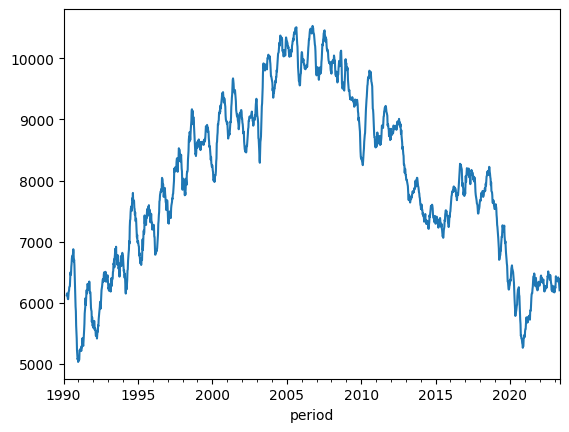

In [7]:
imports = imports.groupby('period').sum()
imports.rolling(12).mean().plot.line()

<AxesSubplot:xlabel='period'>

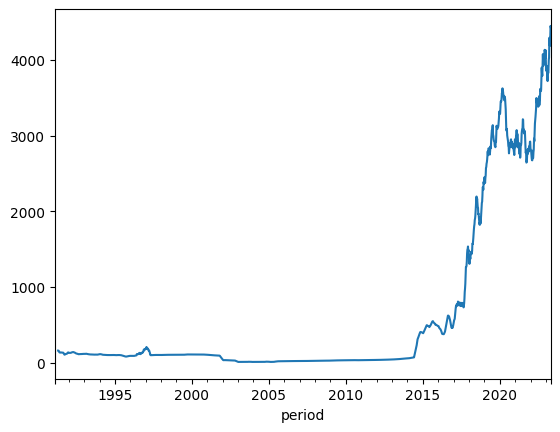

In [8]:
exports = exports.groupby('period').sum()
exports.rolling(12).mean().plot.line()

In [9]:
imports = imports.rename('imports')
exports = exports.rename('exports')

In [10]:
merged_df = pd.merge(imports, exports, on='period')

In [11]:
merged_df['diff'] = merged_df['imports'] - merged_df['exports']

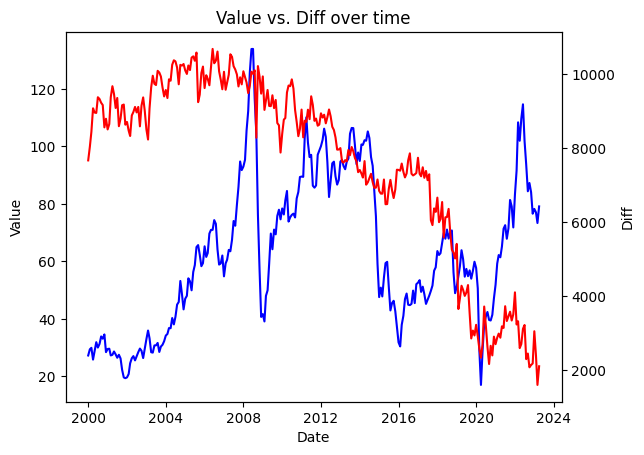

In [12]:
merged_df['date'] = merged_df.index.strftime('%Y-%m')
wti['date'] = wti.index
wti['date'] = wti['date'].apply(lambda x: x[:-3])
wti['date'] = pd.to_datetime(wti['date'])
merged_df['date'] = pd.to_datetime(merged_df['date'])

wti = wti.set_index('date')
merged_df = merged_df.set_index('date')

merged_df = merged_df['diff']
wti_diff = pd.merge(wti, merged_df, on='date').groupby('date').mean()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# plot the 'value' line on the first axis
ax1.plot(wti_diff.index, wti_diff['value'], color='blue')
ax1.set_ylabel('Value')

# plot the 'diff' line on the second axis
ax2.plot(wti_diff.index, wti_diff['diff'], color='red')
ax2.set_ylabel('Diff')

# set the x-axis label
ax1.set_xlabel('Date')

# set the title
plt.title('Value vs. Diff over time')

# show the plot
plt.show()

In [13]:
corr_matrix = wti_diff.corr()
corr_matrix

,value,diff
value,1.000000,-0.077986
diff,-0.077986,1.000000


<AxesSubplot:xlabel='date'>

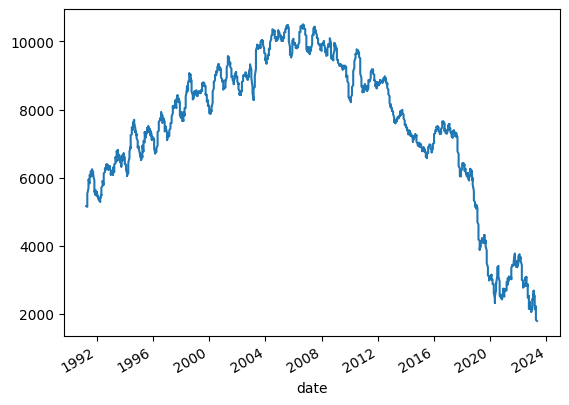

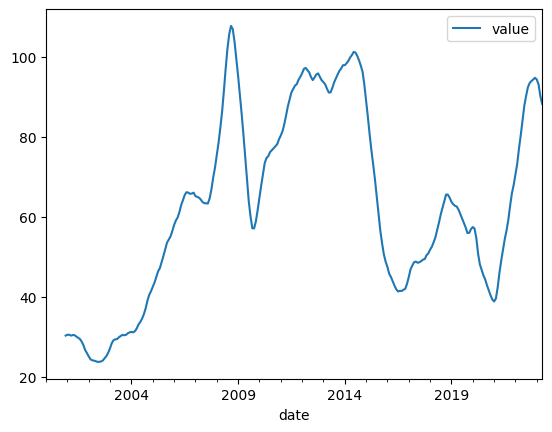

In [14]:
merged_df.rolling(12).mean().plot.line()
wti.rolling(12).mean().plot.line()

<AxesSubplot:xlabel='date'>

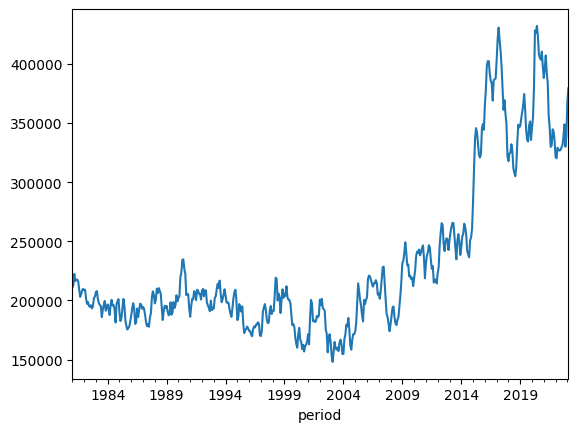

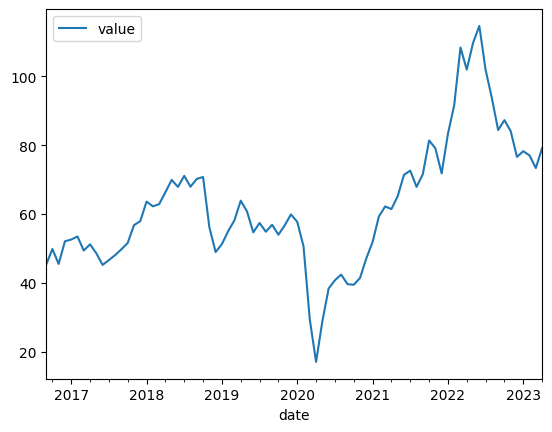

In [15]:
crude_stocks.plot.line()
wti['2016-09-01':].plot.line()

<AxesSubplot:xlabel='period'>

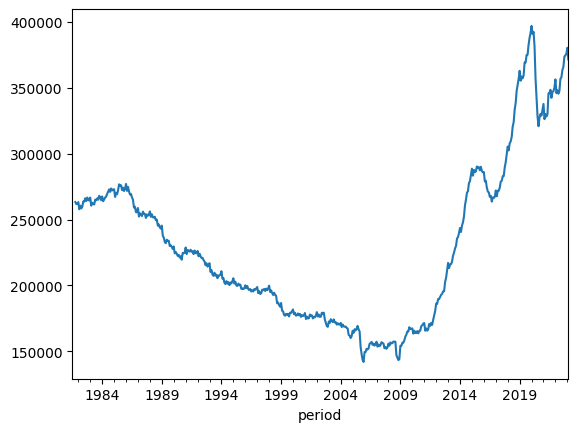

In [16]:
production.rolling(4).mean().plot.line()

<AxesSubplot:xlabel='date'>

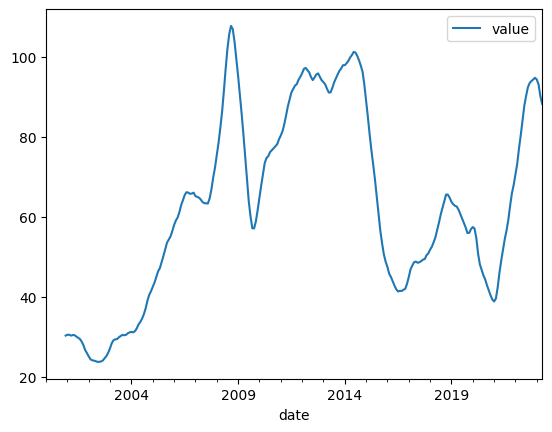

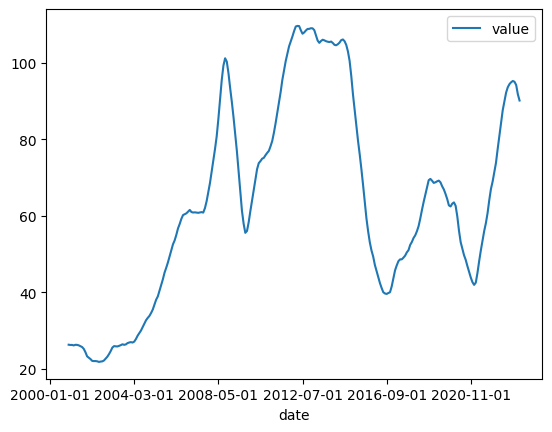

In [17]:
wti.rolling(12).mean().plot.line()
dubai.rolling(12).mean().plot.line()

In [18]:
dubai.index = pd.to_datetime(dubai.index)
wti_dub = pd.merge(wti, dubai, on='date')

In [19]:
wti_dub['wti - dubai'] = wti_dub['value_x'] - wti_dub['value_y']


<AxesSubplot:xlabel='date'>

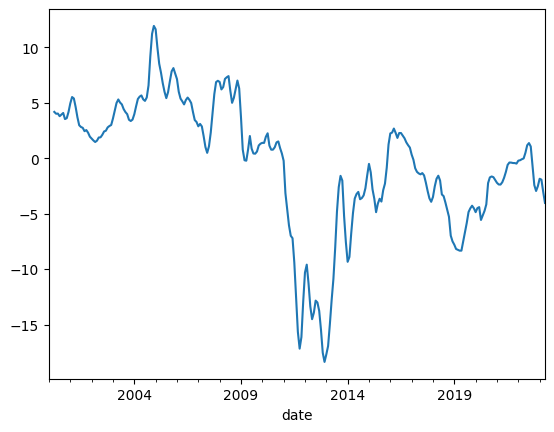

In [20]:
wti_dub['wti - dubai'].rolling(4).mean().plot.line()

In [21]:
data = oil.mbbl_production()
data

period
1981-07-01    263498
1981-08-01    266069
1981-09-01    258120
1981-10-01    265450
1981-11-01    257579
               ...  
2022-10-01    384923
2022-11-01    371377
2022-12-01    376605
2023-01-01    388608
2023-02-01    349530
Name: testing, Length: 500, dtype: int64

<AxesSubplot:xlabel='period'>

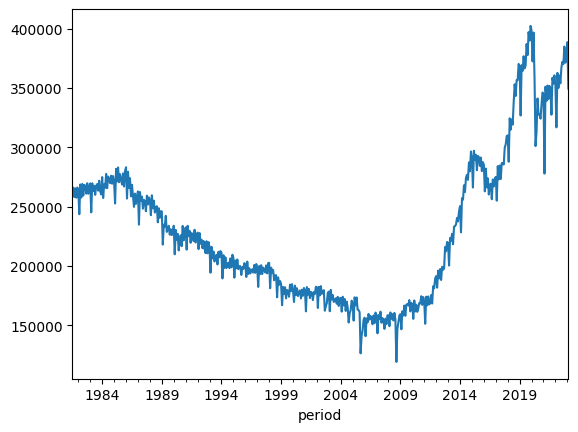

In [22]:
data.plot.line()

In [23]:
data = oil.weekly_product_supplied()

<AxesSubplot:xlabel='period'>

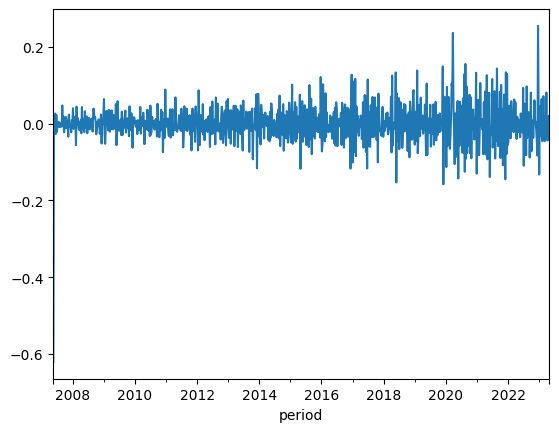

In [24]:
change = data.pct_change(-1)
change.plot()

<AxesSubplot:xlabel='period'>

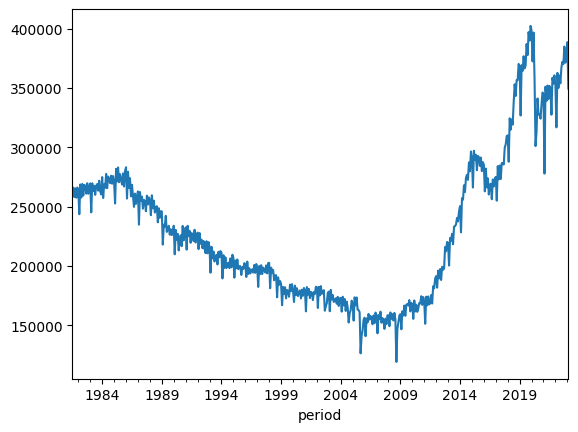

In [25]:
production.plot.line()

In [2]:
imports, exports = oil.imports_exports(only_crude=False)
net_imports = pd.merge(imports, exports, on='period')
net_imports['net_imports'] = net_imports['imports'] - net_imports['exports']

In [2]:
data = oil.proved_nonprod_reserves()

In [3]:
data

period
1970-01-01 00:00:00.000002021    11290
1970-01-01 00:00:00.000002020    10559
1970-01-01 00:00:00.000002019    16251
1970-01-01 00:00:00.000002018    17316
1970-01-01 00:00:00.000002017    16059
1970-01-01 00:00:00.000002016    13317
1970-01-01 00:00:00.000002015    12590
1970-01-01 00:00:00.000002014    14816
1970-01-01 00:00:00.000002013    13200
1970-01-01 00:00:00.000002012    11884
1970-01-01 00:00:00.000002011     9049
1970-01-01 00:00:00.000002010     6980
1970-01-01 00:00:00.000002009     6015
1970-01-01 00:00:00.000002008     5400
1970-01-01 00:00:00.000002007     5455
1970-01-01 00:00:00.000002006     5174
1970-01-01 00:00:00.000002005     5691
1970-01-01 00:00:00.000002004     5143
1970-01-01 00:00:00.000002003     5580
1970-01-01 00:00:00.000002002     5271
1970-01-01 00:00:00.000002001     5195
1970-01-01 00:00:00.000002000     4019
1970-01-01 00:00:00.000001999     4206
1970-01-01 00:00:00.000001998     4147
1970-01-01 00:00:00.000001997     3755
1970-01-01 00:00:0